In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



In [26]:
# Load your continuous value data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Code/clean_data.csv')  # Load your data from a CSV file or any other source




In [27]:
data.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_type,standard_value,standard_units,MW,HeavyAtomMolWt,LogP,MolMR,NumHDonors,NumHAcceptors,NumAtoms,AR,TPSA,RB,bioactivity_class
0,0,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,Ki,33.0,nM,295.810,273.634,2.8477,81.1270,0.0,3.0,20.0,1.0,29.54,2.0,active
1,1,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,Ki,314.0,nM,295.810,273.634,2.8477,81.1270,0.0,3.0,20.0,1.0,29.54,2.0,inactive
2,2,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,Ki,32.0,nM,303.358,282.190,1.8677,80.3415,0.0,5.0,22.0,1.0,55.84,3.0,active
3,3,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,Ki,388.0,nM,303.358,282.190,1.8677,80.3415,0.0,5.0,22.0,1.0,55.84,3.0,inactive
4,4,CHEMBL333280,CN1CCC(O)(c2ccc(Cl)c(Cl)c2)C([C@@H](O)c2ccc(Cl...,Ki,4140.0,nM,435.178,416.026,5.1731,107.3846,2.0,3.0,26.0,2.0,43.70,3.0,inactive


In [28]:
#Drop unnamed, moleculed_id, canonical smiles
columns_to_drop = ['Unnamed: 0','molecule_chembl_id','canonical_smiles','standard_units']
data = data.drop(columns_to_drop, axis=1)

In [29]:
data.head()

,standard_type,standard_value,MW,HeavyAtomMolWt,LogP,MolMR,NumHDonors,NumHAcceptors,NumAtoms,AR,TPSA,RB,bioactivity_class
0,Ki,33.0,295.810,273.634,2.8477,81.1270,0.0,3.0,20.0,1.0,29.54,2.0,active
1,Ki,314.0,295.810,273.634,2.8477,81.1270,0.0,3.0,20.0,1.0,29.54,2.0,inactive
2,Ki,32.0,303.358,282.190,1.8677,80.3415,0.0,5.0,22.0,1.0,55.84,3.0,active
3,Ki,388.0,303.358,282.190,1.8677,80.3415,0.0,5.0,22.0,1.0,55.84,3.0,inactive
4,Ki,4140.0,435.178,416.026,5.1731,107.3846,2.0,3.0,26.0,2.0,43.70,3.0,inactive


In [30]:
#Encode standard type
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['standard_type_encoded'] = label_encoder.fit_transform(data['standard_type'])
data['bioactivity_encoded'] = label_encoder.fit_transform(data['bioactivity_class'])
columns_to_drop = ['standard_type','bioactivity_class']
data = data.drop(columns_to_drop, axis=1)
data.head()

,standard_value,MW,HeavyAtomMolWt,LogP,MolMR,NumHDonors,NumHAcceptors,NumAtoms,AR,TPSA,RB,standard_type_encoded,bioactivity_encoded
0,33.0,295.810,273.634,2.8477,81.1270,0.0,3.0,20.0,1.0,29.54,2.0,3,0
1,314.0,295.810,273.634,2.8477,81.1270,0.0,3.0,20.0,1.0,29.54,2.0,3,1
2,32.0,303.358,282.190,1.8677,80.3415,0.0,5.0,22.0,1.0,55.84,3.0,3,0
3,388.0,303.358,282.190,1.8677,80.3415,0.0,5.0,22.0,1.0,55.84,3.0,3,1
4,4140.0,435.178,416.026,5.1731,107.3846,2.0,3.0,26.0,2.0,43.70,3.0,3,1


In [32]:
# Extract input features (X) and target variable (y)
X = data.drop('bioactivity_encoded', axis=1)  # Drop the target variable column from input features
y = data['bioactivity_encoded']  # Extract the target variable column

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the architecture of the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use Adam optimizer and mean squared error (MSE) loss for regression

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error (MSE) on Test Set:', mse)

Epoch 1/100
121/121 [==============================] - 2s 4ms/step - loss: 0.3127 - val_loss: 0.1919
Epoch 2/100
121/121 [==============================] - 0s 3ms/step - loss: 0.1796 - val_loss: 0.1791
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: 0.1673 - val_loss: 0.1726
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: 0.1614 - val_loss: 0.1700
Epoch 5/100
121/121 [==============================] - 0s 2ms/step - loss: 0.1556 - val_loss: 0.1667
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: 0.1556 - val_loss: 0.1629
Epoch 7/100
121/121 [==============================] - 0s 3ms/step - loss: 0.1512 - val_loss: 0.1598
Epoch 8/100
121/121 [==============================] - 0s 2ms/step - loss: 0.1460 - val_loss: 0.1581
Epoch 9/100
121/121 [==============================] - 0s 3ms/step - loss: 0.1437 - val_loss: 0.1560
Epoch 10/100
121/121 [==============================] - 0s 2ms/step - loss: 0.1460 - val_lo

In [36]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [34]:
X = data.drop('bioactivity_encoded', axis=1)  # Drop the target variable column from input features
y = data['bioactivity_encoded']  # Extract the target variable column


Accuracy: 0.7545605306799337
Precision: 0.7382331576600872
Recall: 0.7545605306799337
F1-score: 0.738720765429328
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.42      0.50       350
           1       0.79      0.89      0.84       856

    accuracy                           0.75      1206
   macro avg       0.70      0.65      0.67      1206
weighted avg       0.74      0.75      0.74      1206



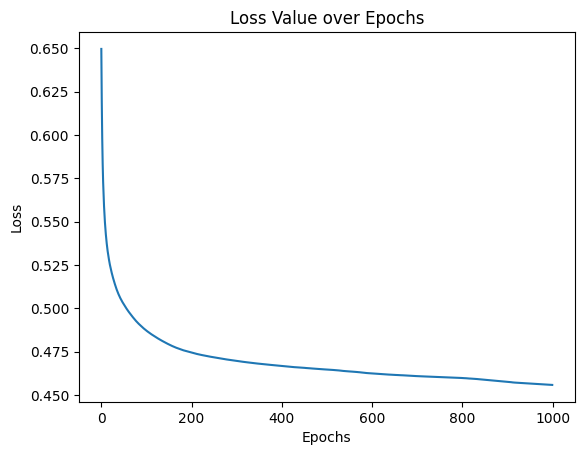

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an ANN model
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
# Store the loss values over epochs
loss_values = []

# Loop through the epochs and fit the model
for i in range(clf.max_iter):
    clf.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    # Compute loss value and append to list
    loss_values.append(clf.loss_)
    
# Predict the target labels for the test set
y_pred = clf.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Compute classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot loss value over epochs
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Value over Epochs')
plt.show()